In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from scipy.stats import norm, skew
from scipy.special import boxcox1p
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
%matplotlib inline

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [235]:
cd "/Users/chiragbhattad/Downloads/Analyze_This_2018"

/Users/chiragbhattad/Downloads/Analyze_This_2018


In [236]:
data = pd.read_csv('Training_dataset_Original.csv')
data.drop(['application_key'],axis=1, inplace=True)
# data.drop(['mvar47'], axis=1, inplace=True)

In [237]:
# cols = data.columns

# for i in cols:
#     count = data[i].isnull().sum()
#     if count>20000:
#         data.drop([i], axis=1, inplace=True)

In [238]:
new_cols = data.columns
print(len(new_cols))

48


In [239]:
data.fillna(value=data.median(axis=0), inplace=True)
print()

In [240]:
numeric_feats = list(data.dtypes[data.dtypes != "object"].index)
numeric_feats.remove('default_ind')
# numeric_feats.remove('mvar1')
# numeric_feats.remove('mvar2')
# numeric_feats.remove('mvar16')
# numeric_feats.remove('mvar17')
# numeric_feats.remove('mvar18')
# numeric_feats.remove('mvar19')
# numeric_feats.remove('mvar20')
# numeric_feats.remove('mvar30')
# numeric_feats.remove('mvar31')
# numeric_feats.remove('mvar35')
# numeric_feats.remove('mvar36')
# numeric_feats.remove('mvar39')
# numeric_feats.remove('mvar40')
# numeric_feats.remove('mvar41')
# numeric_feats.remove('mvar42')
# numeric_feats.remove('mvar47')

In [241]:
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head()


Skew in numerical features: 



,Skew
mvar14,105.896380
mvar13,51.215625
mvar24,41.626102
mvar7,33.305702
mvar10,15.446177


In [242]:
skewness = skewness[abs(skewness) > 1]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
skewed_features = skewness.index
lam = 0.175
for feat in skewed_features:
    #data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)

There are 46 skewed numerical features to Box Cox transform


In [243]:
# C=0  L=1

data['mvar47'].replace(to_replace='C', value=0, inplace=True)
data['mvar47'].replace(to_replace='L', value=1, inplace=True)

## Scale the data

In [244]:
feature = data.columns[:-1]
target = data.columns[-1]
X = data[feature]
y = data[target]

In [245]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [246]:
# data.corr()
# look = data.corr()>0.8
# data['mvar19'] = data['mvar19'] + data['mvar20']
# data.drop(['mvar20'], axis=1, inplace=True)
# data['mvar32'] = data['mvar29'] + data['mvar32'] + data['mvar37']
# data.drop(['mvar29'], axis=1, inplace=True)
# data.drop(['mvar37'], axis=1, inplace=True)

In [247]:
# quantiles_list = [0, 0.25, 0.5, 0.75, 1]
# for cols in numeric_feats:
#     quantiles = data[cols].quantile(quantiles_list)
#     plt.hist(data[cols], bins=50)
#     for quantile in quantiles:
#         plt.axvline(quantile, c='r')
# plt.show()

## Skewness removal of Leaderboard dataset

In [248]:
lead_data = pd.read_csv('Leaderboard_dataset.csv')

In [249]:
lead_cols = ['application_key']+ list(data.columns)[:-1]
lead_data = lead_data[lead_cols]

In [250]:
lead_data.fillna(value=lead_data.median(axis=0), inplace=True)
print("")

In [251]:
numeric_feats1 = list(lead_data.dtypes[lead_data.dtypes != "object"].index)
# numeric_feats1.remove('mvar47')
numeric_feats1.remove('application_key')
# numeric_feats1.remove('mvar1')
# numeric_feats1.remove('mvar2')
# numeric_feats1.remove('mvar16')
# numeric_feats1.remove('mvar17')
# numeric_feats1.remove('mvar18')
# numeric_feats1.remove('mvar19')
# numeric_feats1.remove('mvar20')
# numeric_feats1.remove('mvar30')
# numeric_feats1.remove('mvar31')
# numeric_feats1.remove('mvar35')
# numeric_feats1.remove('mvar36')
# numeric_feats1.remove('mvar39')
# numeric_feats1.remove('mvar40')
# numeric_feats1.remove('mvar41')
# numeric_feats1.remove('mvar42')

In [252]:
skewed_feats1 = lead_data[numeric_feats1].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness1 = pd.DataFrame({'Skew' :skewed_feats1})
skewness1.head()


Skew in numerical features: 



,Skew
mvar14,153.271851
mvar11,78.962244
mvar7,53.248164
mvar24,38.179394
mvar10,24.884558


In [253]:
skewness1 = skewness1[abs(skewness1) > 1]
print("There are {} skewed numerical features to Box Cox transform".format(skewness1.shape[0]))

from scipy.special import boxcox1p
skewed_features1 = skewness1.index
lam = 0.175
for feat in skewed_features1:
    #data[feat] += 1
    lead_data[feat] = boxcox1p(lead_data[feat], lam)

There are 46 skewed numerical features to Box Cox transform


In [254]:
lead_data['mvar47'].replace(to_replace='C', value=0, inplace=True)
lead_data['mvar47'].replace(to_replace='L', value=1, inplace=True)

In [255]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Model

In [256]:
xgb = XGBClassifier(n_jobs=-1, silent=False, random_state=1, objective="binary:logistic", )
# 'learning_rate':[0.01, 0.05, 0.1, 0.2],
param_grid = {'booster': ["gbtree"],
              'colsample_bylevel': [0.8],
              'colsample_bytree': [0.8],
              'subsample': [0.8],
              'max_delta_step':[0],
              'max_depth': [6],
              'min_child_weight': [1],
              'n_estimators': [310],
              'learning_rate': [0.05],
              'gamma': [5],
              'reg_lambda': [23],
             }



CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,scoring='roc_auc', cv=2, verbose=1)
CV_xgb.fit(X, y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min finished


GridSearchCV(cv=2, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=False, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'booster': ['gbtree'], 'colsample_bylevel': [0.8], 'colsample_bytree': [0.8], 'subsample': [0.8], 'max_delta_step': [0], 'max_depth': [6], 'min_child_weight': [1], 'n_estimators': [310], 'learning_rate': [0.05], 'gamma': [5], 'reg_lambda': [23]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [257]:
# param_grid = {'booster': ["gbtree"],
#               'colsample_bylevel': [0.8],
#               'colsample_bytree': [0.8],
#               'subsample': [0.8],
#               'max_delta_step':[0],
#               'max_depth': [6],
#               'min_child_weight': [1],
#               'n_estimators': [300],
#               'learning_rate': [0.05],
#               'gamma': [45],
#               'reg_lambda': [23]
#              }

In [258]:
train_score = CV_xgb.score(X_train, y_train)
test_score = CV_xgb.score(X_test, y_test)

print(train_score)
print(test_score)

0.8682414284639046
0.870156026732264


## Running the model on Leaderboard dataset

In [259]:
X_lead = lead_data[lead_data.columns[1:]]
# X_lead = X_lead.as_matrix()

In [260]:
X_lead = sc.fit_transform(X_lead)
# X_lead = pca.transform(X_lead)

In [261]:
# predictions = classifier.predict(X_lead)
predictions = CV_xgb.predict_proba(X_lead)
predictions.shape

(25000, 2)

In [262]:
predictions = predictions[:,1]
sub = pd.DataFrame()
sub['app_id'] = lead_data['application_key']
sub['pred'] = pd.Series(predictions)
# sub['pred'] = predictions

In [263]:
sub.sort_values(by=['pred'],ascending=True, inplace=True)
sub['pred'] = [1 if x >=0.50 else 0 for x in sub['pred']]

In [264]:
np.savetxt('Etching_coders_IITMadras_371.csv',sub,fmt='%5d', delimiter=",")

# Evaluation Dataset:

In [265]:
eval_data = pd.read_csv('Evaluation_dataset.csv')
eval_cols = ['application_key']+ list(data.columns)[:-1]
eval_data = eval_data[eval_cols]

In [266]:
eval_data.fillna(value=eval_data.median(axis=0), inplace=True)
print("")

### PCA for Eval dataset

In [267]:
numeric_feats2 = list(eval_data.dtypes[eval_data.dtypes != "object"].index)
# numeric_feats1.remove('mvar47')
numeric_feats2.remove('application_key')

In [268]:
skewed_feats2 = eval_data[numeric_feats2].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness2 = pd.DataFrame({'Skew' :skewed_feats2})
skewness2.head()


Skew in numerical features: 



,Skew
mvar14,104.977239
mvar13,74.917028
mvar24,49.228692
mvar15,19.514943
mvar11,14.346505


In [269]:
skewness2 = skewness2[abs(skewness2) > 1]
print("There are {} skewed numerical features to Box Cox transform".format(skewness2.shape[0]))

from scipy.special import boxcox1p
skewed_features2 = skewness2.index
lam = 0.175
for feat in skewed_features2:
    #data[feat] += 1
    eval_data[feat] = boxcox1p(eval_data[feat], lam)

There are 46 skewed numerical features to Box Cox transform


In [270]:
eval_data['mvar47'].replace(to_replace='C', value=0, inplace=True)
eval_data['mvar47'].replace(to_replace='L', value=1, inplace=True)

In [271]:
sc2 = StandardScaler()
eval_X = sc2.fit_transform(eval_data)

In [272]:
pca2 = PCA(n_components=2, random_state=1)
principal_components2 = pca2.fit_transform(eval_X)

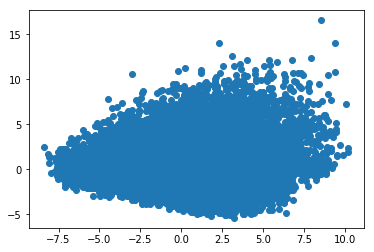

In [273]:
plt.scatter(principal_components2[:,0],principal_components2[:,1])

In [274]:
X_eval = eval_data[eval_data.columns[1:]]
# X_eval = X_eval.as_matrix()

In [275]:
X_eval = sc.fit_transform(X_eval)
# X_eval = pca.transform(X_eval)

In [276]:
# eval_pred = classifier.predict(X_eval)
eval_pred = CV_xgb.predict_proba(X_eval)
eval_pred.shape

(25000, 2)

In [277]:
eval_pred = eval_pred[:,1]
sub_eval = pd.DataFrame()
sub_eval['app_id'] = eval_data['application_key']
sub_eval['pred'] = pd.Series(eval_pred)
# sub_eval['pred'] = eval_pred

In [278]:
sub_eval.sort_values(by=['pred'],ascending=True, inplace=True)
sub_eval['pred'] = [1 if x >=0.50 else 0 for x in sub_eval['pred']]

In [279]:
np.savetxt('Etching_coders_IITMadras_Evaluation_dataset.csv', sub_eval, fmt='%5d', delimiter=",")